In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [25]:
iris = pd.read_csv('iris.csv')

In [26]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### No missing values

In [27]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### No missing values !

In [28]:
classes = iris['variety'].unique()
print(classes)

['Setosa' 'Versicolor' 'Virginica']


In [29]:
for variety in classes:
    print("{} - {}".format(variety,iris[iris['variety'] == variety]['variety'].count()))

Setosa - 50
Versicolor - 50
Virginica - 50


#### This shows that data is uniformly distributed across all classes

C:\Users\riyas\Envs\midas\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


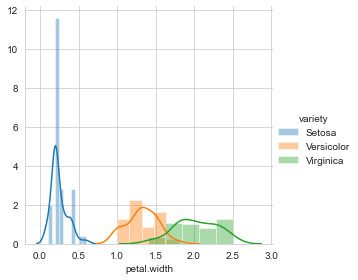

In [30]:
sns.FacetGrid(iris,hue="variety",size=4,sharex = True) \
    .map(sns.distplot,"petal.width") \
    .add_legend();

plt.show();

C:\Users\riyas\Envs\midas\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


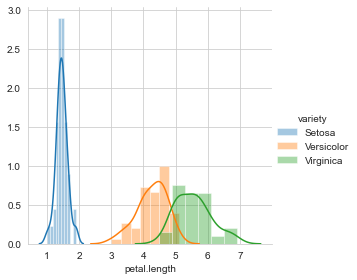

In [31]:

sns.FacetGrid(iris,hue="variety",size=4,sharex = True) \
    .map(sns.distplot,"petal.length") \
    .add_legend();

C:\Users\riyas\Envs\midas\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


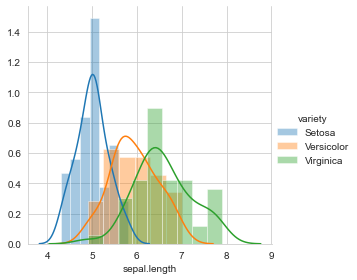

In [32]:
sns.FacetGrid(iris,hue="variety",size=4,sharex = True) \
    .map(sns.distplot,"sepal.length") \
    .add_legend();

C:\Users\riyas\Envs\midas\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


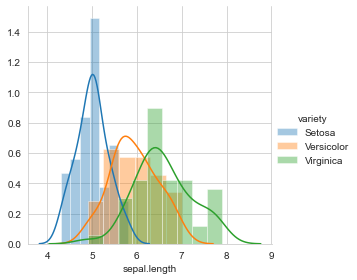

In [33]:
sns.FacetGrid(iris,hue="variety",size=4,sharex = True) \
    .map(sns.distplot,"sepal.length") \
    .add_legend();

#### The above plots show that petal width and petal length is apt for classification as sepal length and sepal width demonstrates overlap.

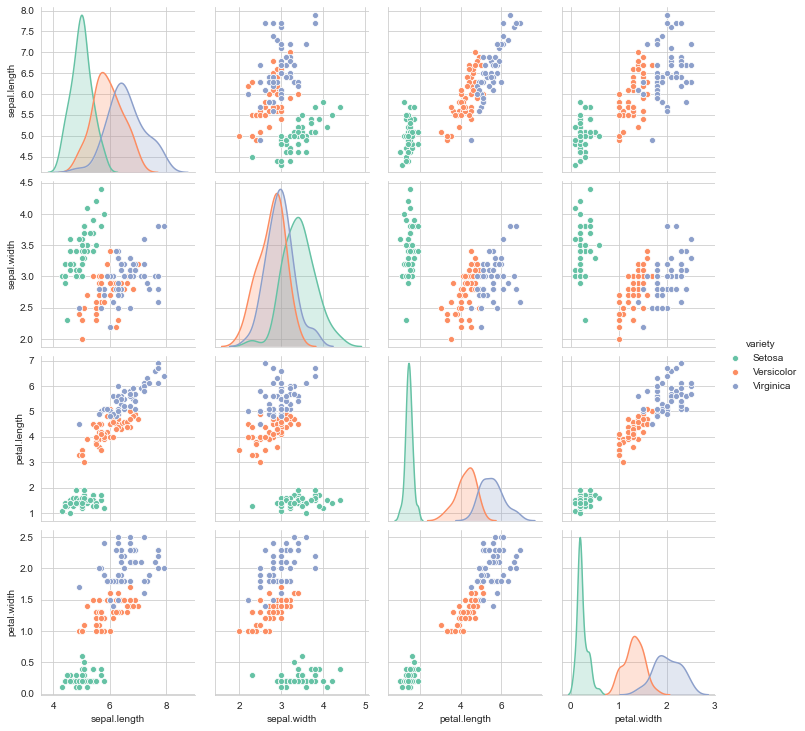

In [46]:
sns.pairplot(data=iris, hue='variety', palette='Set2')


#### This shows that Petal width and Petal length might be good features for classification. Also, as can be seen, Setosa is quite easily separable while the other two classes have some overlap

In [48]:
y = iris['variety']
X = iris.drop('variety',axis=1)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2, random_state=42)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [50]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 4) (120, 1)
(30, 4) (30, 1)


In [51]:
from sklearn.svm import SVC

model = SVC(C=4.0, degree=3,decision_function_shape="ovr")
model.fit(X_train,y_train)


print('Accuracy of SVC on training set: {:.2f}'.format(model.score(X_train, y_train) * 100))

# print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))
pred = model.predict(X_test)

Accuracy of SVC on training set: 99.17


In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

